# Decision Point Price Momentum Oscillator (PMO)

[Stocks Chart Link](https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:dppmo)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

## Importing Stock Price of Reliance

In [2]:
symbol = 'RELIANCE.NS'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,542.000000,545.000000,536.174988,542.549988,530.454773,3244916
2017-01-03,544.924988,548.500000,540.549988,544.700012,532.556885,2941502
2017-01-04,546.450012,546.500000,532.150024,533.575012,521.679932,4751094
2017-01-05,535.500000,539.950012,534.375000,538.700012,526.690674,3992966
2017-01-06,537.099976,542.500000,536.549988,537.474976,525.492920,3586854


### Gradually generating PMO Line and PMO Signal Line

In [3]:
#generating returns
df['returns'] = df['Close'].pct_change()*100
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2017-01-03,544.924988,548.500000,540.549988,544.700012,532.556885,2941502,0.396281
2017-01-04,546.450012,546.500000,532.150024,533.575012,521.679932,4751094,-2.042409
2017-01-05,535.500000,539.950012,534.375000,538.700012,526.690674,3992966,0.960502
2017-01-06,537.099976,542.500000,536.549988,537.474976,525.492920,3586854,-0.227406
2017-01-09,538.500000,543.000000,535.500000,538.849976,526.837219,2390514,0.255826


In [4]:
#10 times of 35 period custom smoothing of returns (35 period EMA of returns)*10
df['EMA_35'] = ta.EMA(df['returns'], timeperiod = 35)
df.dropna(inplace = True)
df['EMA_35'] = df['EMA_35']*10
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns,EMA_35
Date,,,,,,,,
2017-02-21,537.599976,545.474976,536.525024,544.099976,531.970215,6485580,1.190248,0.139414
2017-02-22,546.500000,605.825012,546.000000,603.750000,590.290466,58207852,10.963063,6.222259
2017-02-23,606.799988,611.000000,589.674988,591.375000,578.191284,28458468,-2.049689,4.737862
2017-02-27,595.250000,628.400024,595.174988,619.450012,605.640442,38137822,4.747413,7.112099
2017-02-28,616.000000,624.000000,614.250000,619.025024,605.224976,16509062,-0.068607,6.678867


In [5]:
#PMO Line = 20 period ema of EMA_35
df['PMO_Line'] = ta.EMA(df['EMA_35'], timeperiod=20)
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns,EMA_35,PMO_Line
Date,,,,,,,,,
2017-03-22,626.000000,632.950012,623.275024,629.849976,615.808533,9276676,-0.324426,2.746333,5.515205
2017-03-23,631.575012,638.775024,629.000000,636.650024,622.456970,5398180,1.079630,3.193553,5.294095
2017-03-24,637.049988,646.000000,634.224976,643.375000,629.032043,7443822,1.056306,3.602970,5.133036
2017-03-27,635.549988,639.375000,623.599976,625.549988,611.604431,14836244,-2.770548,1.863612,4.821662
2017-03-28,629.000000,632.000000,621.049988,622.875000,608.989136,9923868,-0.427622,1.522511,4.507457


In [6]:
#PMO signal line = 10 period ema of PMO Line
df['PMO_Signal_Line'] = ta.EMA(df['PMO_Line'], timeperiod = 10)
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns,EMA_35,PMO_Line,PMO_Signal_Line
Date,,,,,,,,,,
2017-04-05,697.599976,709.000000,690.049988,707.500000,691.727478,18434720,2.935291,7.777684,4.679602,4.678017
2017-04-06,704.500000,724.450012,701.099976,719.250000,703.215576,23142150,1.660777,8.268245,5.021377,4.740446
2017-04-07,710.650024,717.000000,701.275024,703.299988,687.621033,14572302,-2.217589,6.576904,5.169523,4.818460
2017-04-10,705.000000,712.450012,688.650024,690.674988,675.277588,14066282,-1.795109,5.214238,5.173781,4.883064
2017-04-11,693.924988,700.224976,685.049988,686.174988,670.877869,14743454,-0.651537,4.562593,5.115573,4.925339


### Graphical Visualisation

Text(0.5, 0, 'Date')

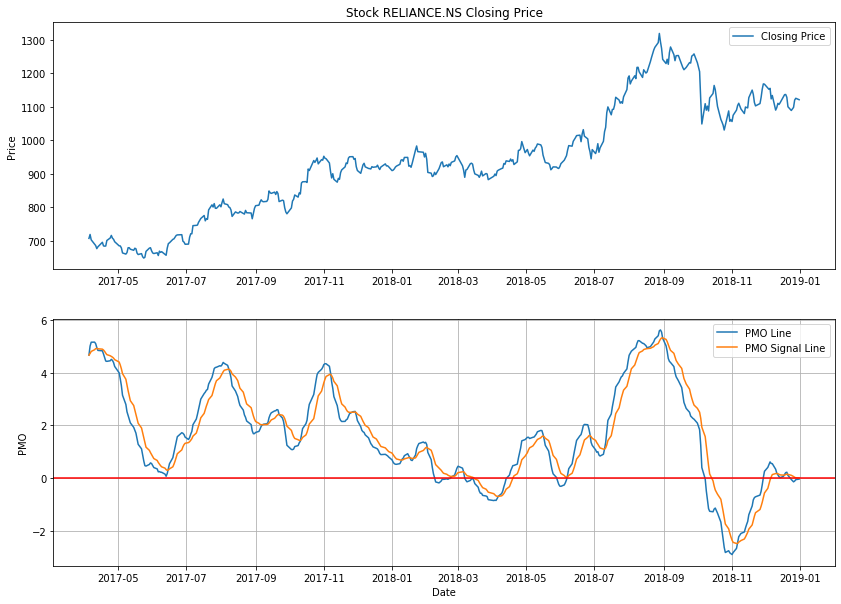

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Close'], label = 'Closing Price')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PMO_Line'], label='PMO Line')
ax2.plot(df['PMO_Signal_Line'], label='PMO Signal Line')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')